In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [156]:
def ab_test_results(groups, active_studs, checks):
    active_a = pd.merge(studs, groups, left_on='student_id', right_on='id').groupby('grp').size()[0]
    active_b = pd.merge(studs, groups, left_on='student_id', right_on='id').groupby('grp').size()[1]
    payed_users = checks.merge(studs, how='inner', on='student_id')
    data_ab = pd.merge(payed_users, groups, left_on='student_id', right_on='id')
    users_A = data_ab[data_ab['grp'] == 'A']
    users_B = data_ab[data_ab['grp'] == 'B']
    arpu_a = users_A.rev.sum()/active_a
    arpu_b = users_B.rev.sum()/active_b
    arppu_a = users_A.rev.sum()/len(users_A.rev)
    arppu_b = users_B.rev.sum()/len(users_B.rev)
    size_a = pd.merge(studs, groups, left_on='student_id', right_on='id').groupby('grp').size()[0]
    size_b = pd.merge(studs, groups, left_on='student_id', right_on='id').groupby('grp').size()[1]
    CR_a = len(users_A)/size_a
    CR_b = len(users_B)/size_b
    fig, axes = plt.subplots(1, 3, figsize=(20,5))
    fig.suptitle('A/B Test Results', fontsize=16)
    sns.barplot(x=['ARPU A', 'ARPU B'], y=[arpu_a, arpu_b], ax=axes[0]);
    axes[0].set_ylabel('ARPU')
    sns.barplot(x=['ARPPU A', 'ARPPU B'], y=[arppu_a, arppu_b], ax=axes[1]);
    axes[1].set_ylabel('ARPPU')
    sns.barplot(x=['CR A', 'CR B'],y=[CR_a, CR_b], ax=axes[2]);
    axes[1].set_ylabel('CR')

In [157]:
studs = pd.read_csv('active_studs.csv')
checks = pd.read_csv('checks.csv', delimiter=';')
groups = pd.read_csv('groups.csv', delimiter=';')

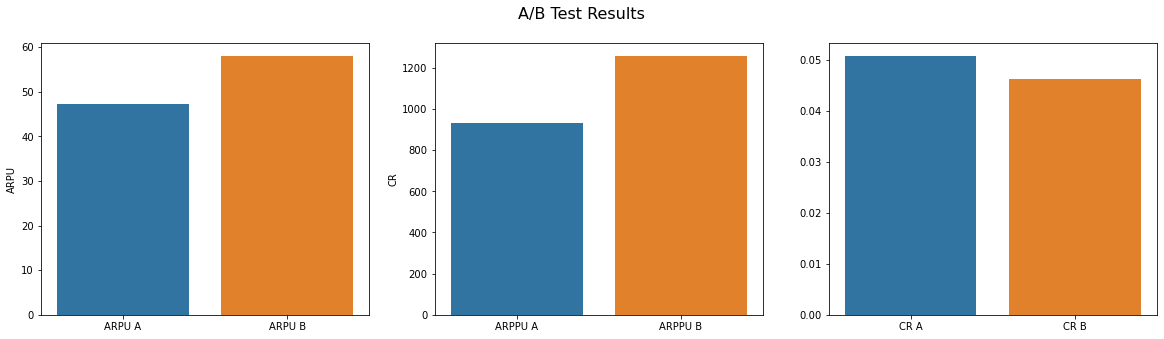

In [158]:
ab_test_results(groups, studs, checks)